# Is Fandango Still Overrating Movies?

Fandango is a company that sells movie tickets in their website and mobile application, and also rates such movies. In 2015, Fandango was in the middle of a controversy, because an article from ThirtyFiveEight by Walt Hickey revealed that the ratings in their website were biased and deceptive. 

Hickey found that the ratings displayed in the website (star ratings) were different from the actual ratings. The difference was in the rounding, the actual ratings were round up to the nearest half-star; therefore a 4.1 rating would become a 4.5 star-rating. After this, Fandango replied that it was a bug with their system and that they would fix the problem with the ratings. 

The article by Walt Hickey can be found [here](https://fivethirtyeight.com/features/fandango-movies-ratings/) and the data that he use in [here](https://github.com/fivethirtyeight/data/blob/master/fandango/fandango_score_comparison.csv).

In this project, we are going to analysis if Fandango really fixed the problem a year after the publication of the article. In order to do this, two datasets are going to be used, Walt Hickey's article dataset and a 2016 dataset of Fandango and other movie ratings; this dataset was collected by Alex Olteanu and can be found [here](https://github.com/mircealex/Movie_ratings_2016_17).

## Importing the data

Let's first import the two datasets and have a quick look of them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# importing Walt Hickey's dataset
ratings_15 = pd.read_csv('fandango_score_comparison.csv')
# importing the dataset after the article
ratings_16 = pd.read_csv('movie_ratings_16_17.csv')
ratings_15.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [6]:
ratings_16.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


## Data preparation
Because we just want to analyze Fandango ratings, we are going to isolate the columns that are in our interest for the analysis. 

In [9]:
# we use the copy() to avoid the SettingWithCopyWarning message
fandango_15 = ratings_15[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue','Fandango_votes', 'Fandango_Difference']].copy()
fandango_15.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [8]:
fandango_16 = ratings_16[['movie','year','fandango']].copy()
fandango_16.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


As it can be seen in the table above, the fandango_16 dataframe also contains information of 2017.This information is not needed, as we want to analyze if Fandango fixed the problem as soon as possible. For this reason, we are going to find out if there are more rows from different years than 2015 and 2016, and in the case these rows exist, they will be removed. 

In [11]:
# generation of a Year column by extracting the year from the FILM column
fandango_15['Year'] = fandango_15['FILM'].str[-5:-1]
fandango_15.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [12]:
# frequency table of fandango_15 year values
fandango_15['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In the fandango_15 dataframe there are values from 2014, so they will be removed. 

In [13]:
fandango_15 = fandango_15[fandango_15['Year']=='2015'].copy()
fandango_15['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [22]:
# frequency table of fandango_16 year values
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

As it was established before, there are some 2017 movies in fandango_16 dataframe, these rows are going to be removed. 

In [15]:
fandango_16 = fandango_16[fandango_16['year'] == 2016].copy()
fandango_16['year'].value_counts()

2016    191
Name: year, dtype: int64

## Data analysis

### Comparing distribution shapes

To analyze if there was an actual change in Fandango ratings after Hickey's article, we are going to compare the distribution shape of the movie ratings in 2015 and 2016.

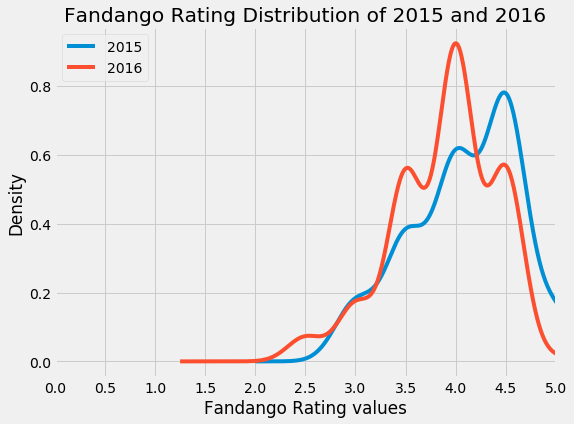

In [16]:
plt.style.use('fivethirtyeight')
fandango_15['Fandango_Stars'].plot.kde(label='2015', legend=True, figsize=(8,6))
fandango_16['fandango'].plot.kde(label='2016', legend=True)
plt.xlabel('Fandango Rating values')
plt.xlim(0,5)
plt.title('Fandango Rating Distribution of 2015 and 2016')
plt.xticks(np.arange(0,5.1,.5))
plt.show()

From the figure above some insights can be obtained:
* The shapes of both distributions are heavily left skewed.
* The 2016 distribution has lower values than the 2015 distribution. 

The heavy left skewed of both distributions suggests that Fandango's movie ratings are high in their 5 stars system. 

The 2016 movie ratings are lower than the 2015 movie ratings, suggesting that in fact Fandango fixed the problem in their system. But let's analyze more data to have a more robust conclusion. 



### Comparing relative frequencies
Now let's compare the relative frequencies of the movie ratings in both years, as the datasets have different number of movies, this will help to analyze if in fact there is a meaningful change in their ratings. 

In [22]:
freq_table_15 = fandango_15['Fandango_Stars'].value_counts(normalize=True) * 100
freq_table_16 = fandango_16['fandango'].value_counts(normalize=True) * 100
pd.concat([freq_table_15,freq_table_16], axis=1).rename(columns={'Fandango_Stars':'2015', 'fandango':'2016'})

,2015,2016
2.5,NaN,3.141361
3.0,8.527132,7.329843
3.5,17.829457,24.083770
4.0,28.682171,40.314136
4.5,37.984496,24.607330
5.0,6.976744,0.523560


* The percentage of movies with high ratings (4.5 and 5) is higher in 2015 than in 2016, 45% to a 25%.
* The minimum rating is lower in 2016 (2.5) than in 2015 (3).

This information also contributes to determine that the ratings in Fandango decrease in 2016 compare to 2015, as seen also in the ratings distributions. 

### Summary Metrics
The last analysis that will be performed to analyze the ratings in 2015 and 2016 will be some summary statistics. 

In [23]:
mean_15 = fandango_15['Fandango_Stars'].mean()
median_15 = fandango_15['Fandango_Stars'].median()
mode_15 = fandango_15['Fandango_Stars'].mode()
mean_16 = fandango_16['fandango'].mean()
median_16 = fandango_16['fandango'].median()
mode_16 = fandango_16['fandango'].mode()
statistics = pd.DataFrame()
statistics['2015'] = [mean_15, median_15, mode_15[0]]
statistics['2016'] = [mean_16, median_16, mode_16[0]]
statistics.index = ['Mean', 'Median', 'Mode']
statistics

,2015,2016
Mean,4.085271,3.887435
Median,4.000000,4.000000
Mode,4.500000,4.000000


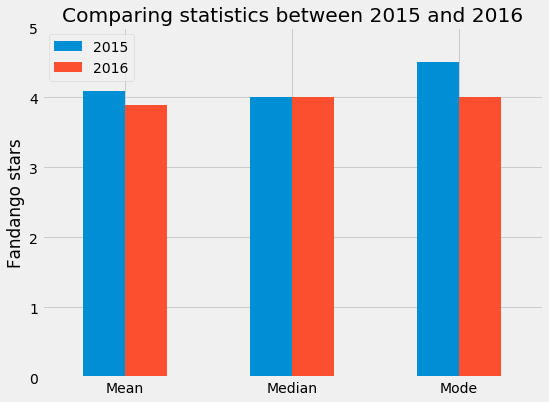

In [24]:
plt.style.use('fivethirtyeight')
statistics.plot(kind='bar', figsize=(8,6))
plt.ylim(0,5)
plt.ylabel('Fandango stars')
plt.xticks(rotation=0)
plt.title('Comparing statistics between 2015 and 2016')
plt.show()


* The mean rating dropped around 5% from 2016 to 2015.
* The median remained the same in both years, but the mode decreased by half-star from 2016 to 2015.

By analyzing the metrics, the ratings from 2016 were lower than the ones from 2015, this in agreement with the graph of the rating distributions and the frequency table of the ratings. 

## Comparing distributions between sites

For last, we are going to compare the movie ratings distributions for Fandango, IMDB, Metacritic and RottenTomatoes(users & critics) in 2016, this in order to analyze if Fandango ratings are still high compared to their competitors.

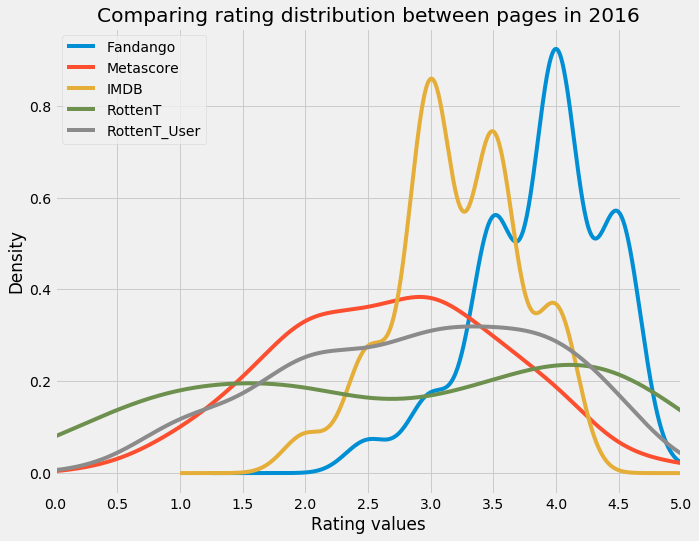

In [26]:
ratings_16 = ratings_16[ratings_16['year']==2016]
plt.style.use('fivethirtyeight')
ratings_16['fandango'].plot.kde(label='Fandango', legend=True, figsize=(10,8))
ratings_16['nr_metascore'].plot.kde(label='Metascore', legend=True)
ratings_16['nr_imdb'].plot.kde(label='IMDB', legend=True)
ratings_16['nr_tmeter'].plot.kde(label='RottenT', legend=True)
ratings_16['nr_audience'].plot.kde(label='RottenT_User', legend=True)
plt.xlabel('Rating values')
plt.xlim(0,5)
plt.title('Comparing rating distribution between pages in 2016')
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.show()	

From the graph it can be observed:
* Fandango ratings are the highest between the sites compared in this analysis.
* Fandango and IMBD are strongly left-skewed. 
* Metacritic and Rotten Tomatoes ratings are more balanced, showing a wide range of values. 

## Conclusion
Our analysis demonstrated that there is in fact a decrease in the movie ratings in Fandango from 2015 to 2016, after the publication of the article by Walt Hickeys. This strongly suggest that Fandango in fact fixed the problem in their system. 

But even with the lower ratings in 2016, Fandango still have the highest ratings compared to other sites. Therefore, Fandango is not the best site for checking movie ratings, maybe would be better to visit Metacritics or Rotten Tomatoes that have a wide range of ratings for a less biased opinion. 

